In [1]:
from keras.datasets import mnist
import matplotlib.pyplot

In [2]:
#Load data set
(X_train,y_train),(X_test, y_test)=mnist.load_data() 

In [3]:
num_train_images=X_train.shape[0]
num_test_images=X_test.shape[0]
print(num_train_images, num_test_images)

60000 10000


In [4]:
#We have 60000 train images of size 28x28 pixels
#and 10000 test images of size 28x28 pixels
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [5]:
print("Shape: " +str(X_train.shape))

Shape: (60000, 28, 28)


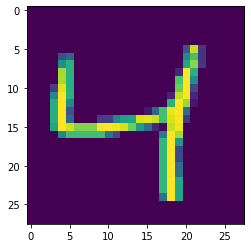

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[2])

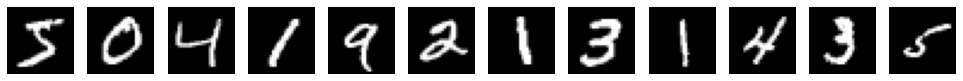

In [7]:
fig,axs=plt.subplots(1,12,figsize=(17,6))
for i in range(12):
  axs[i].imshow(X_train[i], cmap=plt.get_cmap('gray'))
  axs[i].axis('off')

In [8]:
#Dense layer Keras.
#This layer processes the provided entry data in a one dimensional vector.
#That is -> from 28x28 matrix to a 28x28 one dimensional vector.

In [9]:
#X:train.reshape(num_train_images, image_height*image_width)

In [10]:
for i in range(12):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4
3
5


In [11]:
from keras.utils import np_utils

In [12]:
image_height=X_train.shape[1]
image_width=X_train.shape[2]

In [13]:
X_train=X_train.reshape(num_train_images, image_height*image_width).astype('float32')
X_test=X_test.reshape(num_test_images, image_height*image_width).astype('float32')

In [14]:
print("X_train.shape: " + str(X_train.shape))
print("X_test.shape" +str(X_test.shape))
print("y_train.shape: " + str(y_train.shape))
print("y_test.shape" +str(y_test.shape))

X_train.shape: (60000, 784)
X_test.shape(10000, 784)
y_train.shape: (60000,)
y_test.shape(10000,)


In [15]:
print("y_train sample 5 value: " +str(y_train[5]))
print("y_train sample 2 value: " +str(y_train[2]))


y_train sample 5 value: 2
y_train sample 2 value: 4


In [16]:
#Normalizing the values to best performance
X_train=X_train/255
X_test=X_test/255

In [17]:
#Data to categorical values in order to compute error
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
print('Categorical y_train shape :' +str(y_train.shape))
print('Categorical y_train sample 5 vale: ' + str(y_train[5]))
print('Categorical y_train sample 5 vale: ' + str(y_train[2]))
num_classes=y_test.shape[1]
print(num_classes)

Categorical y_train shape :(60000, 10)
Categorical y_train sample 5 vale: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Categorical y_train sample 5 vale: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
10


Simple neural network:


*  Sequential model: First label with 500 neurons.
*  Dense(500, input_dim=784, activation='relu'.
*  Exit layer -> Dense(10,activation='softmax')

Why softmax? Because the exit values are close to 0 or 1.


In [18]:
import numpy as np

In [19]:
x=np.linspace(-10,10,1000)
def soft(x1):
  return 1.0/(1.0+np.exp(-x1))
yt=soft(x)

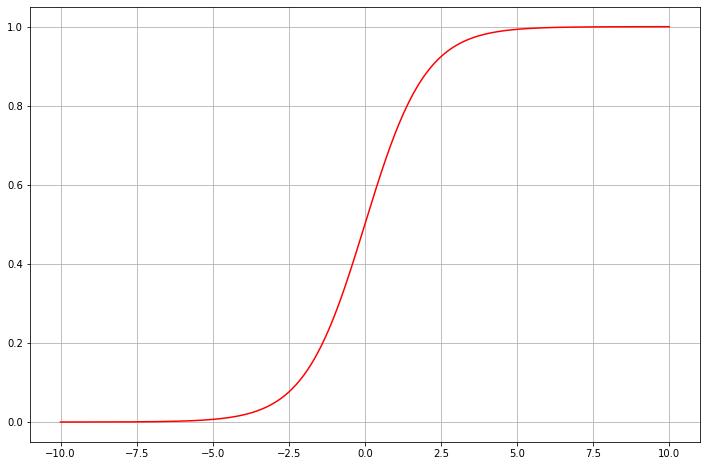

In [20]:
plt.figure(figsize=(12,8))
plt.plot(x,yt,'r')
plt.grid()

In [21]:
X_train[2].shape[0]

784

We will have weights 392.500 between the input layer and the output layer. 

In [22]:
print((784+1)*500)

392500


784 Neurons comming from the (32*32) pixels + 1 bias neuron
and 500 neurons procesing the input layer.

In [23]:
print((500+1)*(10))

5010


5010 weights between the second and third layers.

We compile the model using categorical_crossentropy that minimizes the entropy of categorical data.


In [24]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(500,input_dim=image_height*image_width, activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())
EPOCHS=50
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=EPOCHS,batch_size=256,verbose=0)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
None


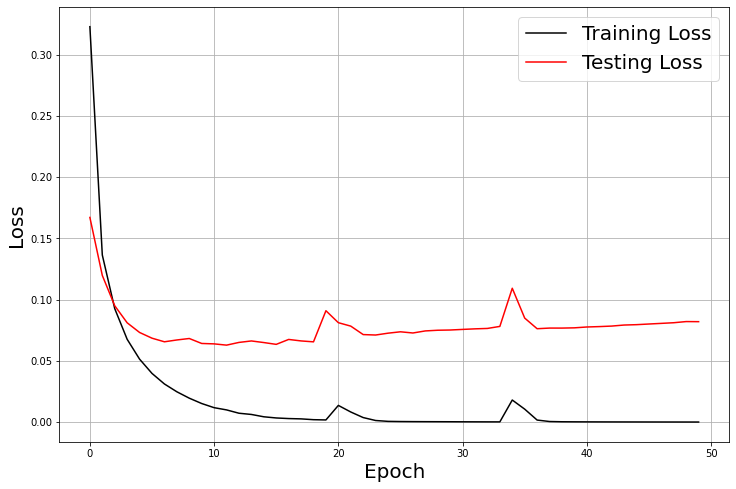

In [25]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],'k-',label='Training Loss')
plt.plot(history.history['val_loss'],'r-',label='Testing Loss')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('Loss_TestTraining.pdf')


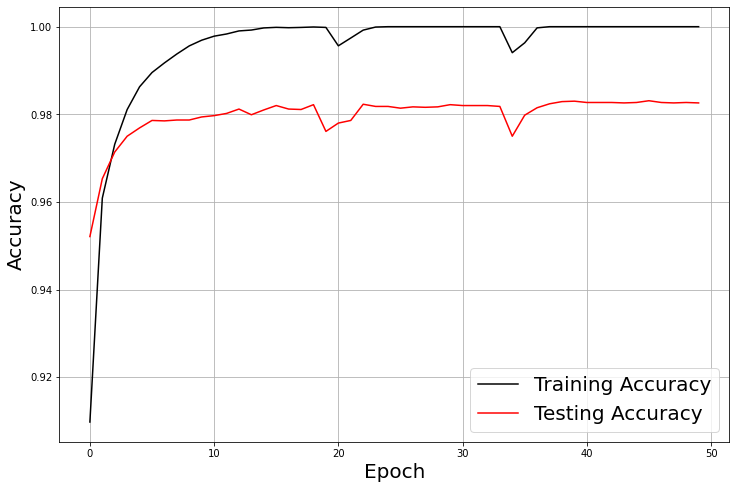

In [26]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],'k-',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='Testing Accuracy')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('Acc_TestTraining.pdf')

The last two plots suggest overffiting in our model. For example, looking at the accuracy plot we observe that in our training sample the classification is perfect while in the testing sample the accuracy is around 98%. 

One possibility to reduce the overfitting is to change the complexity of the neural network, i.e, reduce the number of neurons in the hidden layer. 

In [27]:
model=Sequential()
model.add(Dense(50, input_dim=image_height*image_width, activation='relu'))
model.add(Dense(10,activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=EPOCHS, batch_size=512, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None


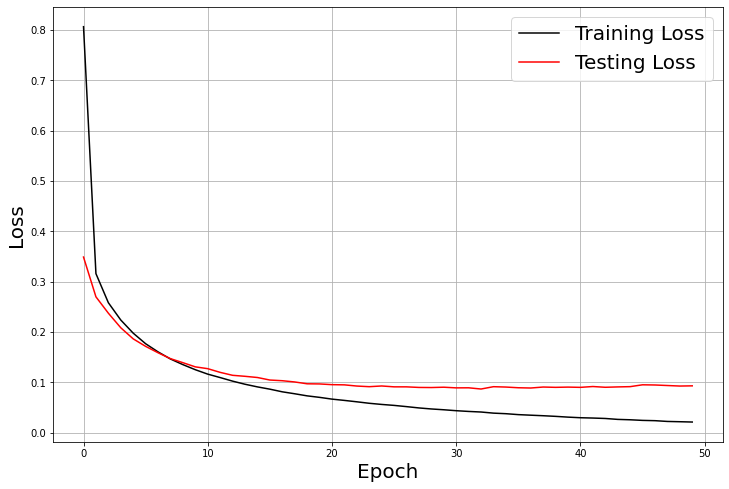

In [28]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],'k-',label='Training Loss')
plt.plot(history.history['val_loss'],'r-',label='Testing Loss')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('Loss_TestTraining1.pdf')

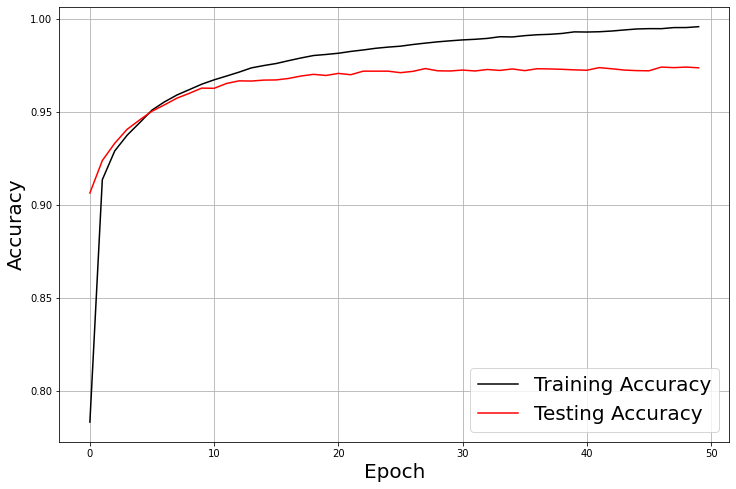

In [29]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],'k-',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='Testing Accuracy')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('Acc_TestTraining1.pdf')

In [31]:
from keras.layers import Dropout
model=Sequential()
model.add(Dense(50,input_dim=image_height*image_width,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
history=model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=EPOCHS, batch_size=512, verbose=0)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                39250     
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None


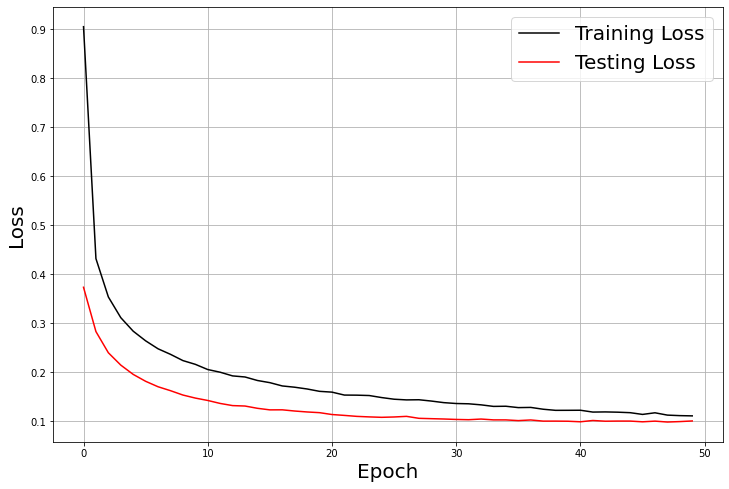

In [32]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'],'k-',label='Training Loss')
plt.plot(history.history['val_loss'],'r-',label='Testing Loss')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Loss',fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('Loss_TestTraining2.pdf')

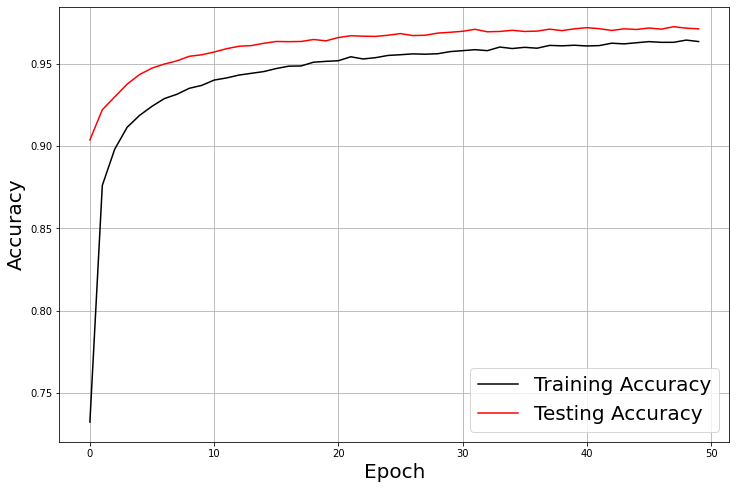

In [33]:
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'],'k-',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'r-',label='Testing Accuracy')
plt.xlabel('Epoch',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.grid()
plt.legend(fontsize=20)
plt.savefig('Acc_TestTraining2.pdf')